In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import requests

<h2>Should you bet on the underdog?</h2>

<p>In this project, I set out to explore how likely an underdog is to win a fight. Surprisingly, the data suggests that underdogs are actually more likely to win than to lose—at least within this dataset. This outcome is quite unexpected, as it challenges the conventional wisdom behind the term "underdog." It seems that, in this case, the label may not carry the typical disadvantage one might assume.

But that's the beauty (and sometimes the frustration) of statistics—numbers can reveal truths that defy our expectations!</p>

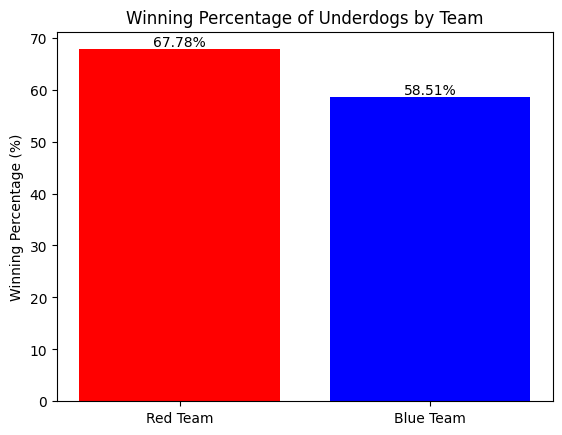

In [37]:
# Load the dataset
ufc_df = pd.read_csv('./data/ufc-master.csv')

# Filter necessary columns
combined_fighters_df = pd.read_csv('./data/ufc-master.csv',
                                   usecols=[0,1,2,3,9])

# Calculate the total number of underdogs for both teams
redMask = combined_fighters_df['RedOdds'] < 0
redUnderdogTotal = combined_fighters_df.loc[redMask].shape[0]

blueMask = combined_fighters_df['BlueOdds'] < 0 
blueUnderdogTotal = combined_fighters_df.loc[blueMask].shape[0]

# Calculate the number of underdog wins for both teams
redUnderdogWinMask = (combined_fighters_df['RedOdds'] < 0) & (combined_fighters_df['Winner'] == 'Red')
redUnderdogWins = combined_fighters_df.loc[redUnderdogWinMask].shape[0]

blueUnderdogWinMask = (combined_fighters_df['BlueOdds'] < 0) & (combined_fighters_df['Winner'] == 'Blue')
blueUnderdogWins = combined_fighters_df.loc[blueUnderdogWinMask].shape[0]

# Calculate the winning percentages
redUnderdogWinPercentage = (redUnderdogWins / redUnderdogTotal) * 100
blueUnderdogWinPercentage = (blueUnderdogWins / blueUnderdogTotal) * 100


# ---- Plot the results ---- #


# Define labels
labels = ['Red Team', 'Blue Team']
winning_percentages = [redUnderdogWinPercentage, blueUnderdogWinPercentage]

# Create the bar chart
plt.bar(labels, winning_percentages, color=['red', 'blue'])

# Add labels and title
plt.ylabel('Winning Percentage (%)')
plt.title('Winning Percentage of Underdogs by Team')

# Optional: Add the percentage values on top of the bars
for i, percentage in enumerate(winning_percentages):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [49]:
# Identify all underdogs
totalUnderdogs = (combined_fighters_df['BlueOdds'] < 0) | (combined_fighters_df['RedOdds'] < 0)

#  Count the total number of underdogs
totalUnderdogCount = combined_fighters_df[totalUnderdogs].shape[0]

#  Count the total number of underdog wins
totalUnderdogWins = (
    ((combined_fighters_df['BlueOdds'] < 0) & (combined_fighters_df['Winner'] == 'Blue')) |
    ((combined_fighters_df['RedOdds'] < 0) & (combined_fighters_df['Winner'] == 'Red'))
).sum()

# Calculate the overall percentage of underdog wins
totalUnderdogWinPercentage = (totalUnderdogWins / totalUnderdogCount) * 100

print(f"Overall Underdog Win Percentage: {totalUnderdogWinPercentage:.2f}%")


Overall Underdog Win Percentage: 67.61%
